![](http://www.dataivy.cn/book/images/head.png)
<table align="center" bgcolor="#FFFFFF" border="0px">
   <tr bgcolor="#FFFFFF">
      <td><img src="http://www.dataivy.cn/book/images/release_date.svg"></td>
      <td><img src="http://www.dataivy.cn/book/images/python-3.7-green.svg"></td>
      <td><a href="http://www.dataivy.cn/blog/python_book_faq/"><img src="http://www.dataivy.cn/book/images/faq-visit_site-blue.svg"></a></td>
      <td><a href="http://www.dataivy.cn/blog/python_book_knows_issues/"><img src="http://www.dataivy.cn/book/images/known_issues.svg"></a></td>
   </tr>
</table>


<hr />

<div align="center"><h1> 第三章&nbsp;&nbsp;10条数据化运营不得不知道的数据预处理经验</h1></div>

# 一、说明

- 描述：“代码实操”以及内容延伸部分源代码
- 时间：2019-01-01
- 作者：宋天龙（Tony Song）
- 程序开发环境：win7 64位
- Python版本：64位 3.7
- 依赖库：具体查看各模块
- 程序输入：具体查看各模块
- 程序输出：具体查看各模块

# 二、程序

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## 3.1 数据清洗：缺失值、异常值和重复值的处理

### 1. 缺失值处理

In [2]:
import pandas as pd  # 导入pandas库
import numpy as np  # 导入numpy库
from sklearn.preprocessing import Imputer  # 导入sklearn.preprocessing中的Imputer库

In [3]:
# 生成缺失数据
df = pd.DataFrame(np.random.randn(6, 4), columns=['col1', 'col2', 'col3', 'col4'])  # 生成一份数据
df.iloc[1:2, 1] = np.nan  # 增加缺失值
df.iloc[4, 3] = np.nan  # 增加缺失值
print(df)

       col1      col2      col3      col4
0 -1.055712 -0.196175 -0.813023 -0.806857
1  0.972878       NaN -1.722135 -0.638893
2  0.444641 -0.189607 -0.199307  3.496211
3  0.273065 -1.970887  0.954170  0.823823
4  0.729248 -1.036644  1.398436       NaN
5 -0.323439  0.208351 -0.429920 -0.175628


In [4]:
# 查看哪些值缺失
nan_all = df.isnull()  # 获得所有数据框中的N值
print(nan_all)  # 打印输出

    col1   col2   col3   col4
0  False  False  False  False
1  False   True  False  False
2  False  False  False  False
3  False  False  False  False
4  False  False  False   True
5  False  False  False  False


In [5]:
# 查看哪些列缺失
nan_col1 = df.isnull().any()  # 获得含有NA的列
nan_col2 = df.isnull().all()  # 获得全部为NA的列
print(nan_col1)  # 打印输出
print(nan_col2)  # 打印输出

col1    False
col2     True
col3    False
col4     True
dtype: bool
col1    False
col2    False
col3    False
col4    False
dtype: bool


In [6]:
# 丢弃缺失值
df2 = df.dropna()  # 直接丢弃含有NA的行记录
print(df2)  # 打印输出

       col1      col2      col3      col4
0 -1.055712 -0.196175 -0.813023 -0.806857
2  0.444641 -0.189607 -0.199307  3.496211
3  0.273065 -1.970887  0.954170  0.823823
5 -0.323439  0.208351 -0.429920 -0.175628


In [7]:
# 使用sklearn将缺失值替换为特定值
nan_model = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 建立替换规则：将值为NaN的缺失值以均值做替换
nan_result = nan_model.fit_transform(df)  # 应用模型规则
print(nan_result)  # 打印输出

[[-1.0557115  -0.19617465 -0.81302314 -0.80685707]
 [ 0.97287751 -0.63699245 -1.72213547 -0.63889289]
 [ 0.44464079 -0.18960693 -0.19930655  3.49621062]
 [ 0.27306467 -1.97088744  0.95417028  0.82382335]
 [ 0.72924769 -1.03664396  1.39843589  0.53973126]
 [-0.32343856  0.20835071 -0.42992032 -0.17562774]]


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
# 使用pandas将缺失值替换为特定值
nan_result_pd1 = df.fillna(method='backfill')  # 用后面的值替换缺失值
nan_result_pd2 = df.fillna(method='bfill', limit=1)  # 用后面的值替代缺失值,限制每列只能替代一个缺失值
nan_result_pd3 = df.fillna(method='pad')  # 用前面的值替换缺失值
nan_result_pd4 = df.fillna(0)  # 用0替换缺失值
nan_result_pd5 = df.fillna({'col2': 1.1, 'col4': 1.2})  # 用不同值替换不同列的缺失值
nan_result_pd6 = df.fillna(df.mean()['col2':'col4'])  # 用平均数代替,选择各自列的均值替换缺失值
# 打印输出
print(nan_result_pd1)  # 打印输出
print(nan_result_pd2)  # 打印输出
print(nan_result_pd3)  # 打印输出
print(nan_result_pd4)  # 打印输出
print(nan_result_pd5)  # 打印输出
print(nan_result_pd6)  # 打印输出

       col1      col2      col3      col4
0 -1.055712 -0.196175 -0.813023 -0.806857
1  0.972878 -0.189607 -1.722135 -0.638893
2  0.444641 -0.189607 -0.199307  3.496211
3  0.273065 -1.970887  0.954170  0.823823
4  0.729248 -1.036644  1.398436 -0.175628
5 -0.323439  0.208351 -0.429920 -0.175628
       col1      col2      col3      col4
0 -1.055712 -0.196175 -0.813023 -0.806857
1  0.972878 -0.189607 -1.722135 -0.638893
2  0.444641 -0.189607 -0.199307  3.496211
3  0.273065 -1.970887  0.954170  0.823823
4  0.729248 -1.036644  1.398436 -0.175628
5 -0.323439  0.208351 -0.429920 -0.175628
       col1      col2      col3      col4
0 -1.055712 -0.196175 -0.813023 -0.806857
1  0.972878 -0.196175 -1.722135 -0.638893
2  0.444641 -0.189607 -0.199307  3.496211
3  0.273065 -1.970887  0.954170  0.823823
4  0.729248 -1.036644  1.398436  0.823823
5 -0.323439  0.208351 -0.429920 -0.175628
       col1      col2      col3      col4
0 -1.055712 -0.196175 -0.813023 -0.806857
1  0.972878  0.000000 -1.722135 -0

### 2.异常值处理

In [9]:
import pandas as pd  # 导入pandas库

In [10]:
# 生成异常数据
df = pd.DataFrame({'col1': [1, 120, 3, 5, 2, 12, 13],
                   'col2': [12, 17, 31, 53, 22, 32, 43]})
print(df)  # 打印输出

   col1  col2
0     1    12
1   120    17
2     3    31
3     5    53
4     2    22
5    12    32
6    13    43


In [11]:
# 通过Z-Score方法判断异常值
df_zscore = df.copy()  # 复制一个用来存储Z-score得分的数据框
cols = df.columns  # 获得数据框的列名
for col in cols:  # 循环读取每列
    df_col = df[col]  # 得到每列的值
    z_score = (df_col - df_col.mean()) / df_col.std()  # 计算每列的Z-score得分
    df_zscore[col] = z_score.abs() > 2.2  # 判断Z-score得分是否大于2.2，如果是则是True，否则为False
print(df_zscore)  # 打印输出

    col1   col2
0  False  False
1   True  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False


In [12]:
# 删除异常值所在的行
df_drop_outlier = df[df_zscore['col1'] == False]
print(df_drop_outlier)

   col1  col2
0     1    12
2     3    31
3     5    53
4     2    22
5    12    32
6    13    43


### 3. 重复值处理

In [13]:
import pandas as pd  # 导入pandas库

In [14]:
# 生成重复数据
data1, data2, data3, data4 = ['a', 3], ['b', 2], ['a', 3], ['c', 2]
df = pd.DataFrame([data1, data2, data3, data4], columns=['col1', 'col2'])
print(df)

  col1  col2
0    a     3
1    b     2
2    a     3
3    c     2


In [15]:
# 判断重复数据
isDuplicated = df.duplicated()  # 判断重复数据记录
print(isDuplicated)  # 打印输出

0    False
1    False
2     True
3    False
dtype: bool


In [16]:
# 删除重复值
print(df.drop_duplicates())  # 删除数据记录中所有列值相同的记录
print(df.drop_duplicates(['col1']))  # 删除数据记录中col1值相同的记录
print(df.drop_duplicates(['col2']))  # 删除数据记录中col2值相同的记录
print(df.drop_duplicates(['col1', 'col2']))  # 除数据记录中指定列（col1/col2）值相同的记录

  col1  col2
0    a     3
1    b     2
3    c     2
  col1  col2
0    a     3
1    b     2
3    c     2
  col1  col2
0    a     3
1    b     2
  col1  col2
0    a     3
1    b     2
3    c     2


## 3.2 将分类数据和顺序数据转换为标志变量

In [17]:
import pandas as pd  # 导入pandas库
from sklearn.preprocessing import OneHotEncoder  # 导入库

In [18]:
# 生成数据
df = pd.DataFrame({'id': [3566841, 6541227, 3512441],
                   'sex': ['male', 'Female', 'Female'],
                   'level': ['high', 'low', 'middle'],
                   'score': [1, 2, 3]})
print(df)  # 打印输出原始数据框

        id     sex   level  score
0  3566841    male    high      1
1  6541227  Female     low      2
2  3512441  Female  middle      3


In [19]:
# 使用sklearn进行标志转换
# 拆分ID和数据列
id_data = df[['id']]  # 获得ID列
raw_convert_data = df.iloc[:, 1:]  # 指定要转换的列
print(raw_convert_data)
# 将数值型分类向量转换为标志变量
model_enc = OneHotEncoder()  # 建立标志转换模型对象（也称为哑编码对象）
df_new2 = model_enc.fit_transform(raw_convert_data).toarray()  # 标志转换
# 合并数据
df_all = pd.concat((id_data, pd.DataFrame(df_new2)), axis=1)  # 重新组合为数据框
print(df_all)  # 打印输出转换后的数据框

      sex   level  score
0    male    high      1
1  Female     low      2
2  Female  middle      3
        id    0    1    2    3    4    5    6    7
0  3566841  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0
1  6541227  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
2  3512441  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0


In [20]:
# 使用pandas的get_dummies做标志转换
df_new3 = pd.get_dummies(raw_convert_data)
df_all2 = pd.concat((id_data, pd.DataFrame(df_new3)), axis=1)  # 重新组合为数据框
print(df_all2)  # 打印输出转换后的数据框

        id  score  sex_Female  sex_male  level_high  level_low  level_middle
0  3566841      1           0         1           1          0             0
1  6541227      2           1         0           0          1             0
2  3512441      3           1         0           0          0             1


## 3.3 大数据时代，数据化运营还需要降维吗

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PolynomialFeatures as plf
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from gplearn.genetic import SymbolicTransformer
from sklearn import datasets

In [22]:
# 读取数据文件
data = np.loadtxt('data1.txt')  # 读取文本数据文件
x, y = data[:, :-1], data[:, -1]  # 获得输入的x和目标变量y
print(x[:3])  # 打印输出x的前3条记录

[[ 1.88622997  1.31785876 -0.16480621  0.56536882 -1.11934542 -0.53218995
  -0.6843102   1.24149827  1.00579225  0.45485041]
 [ 0.45016257  0.67080853 -1.16571355  1.16653938  3.27605586 -0.87270624
  -0.31067627 -0.94946505 -0.33194209 -2.94399437]
 [ 0.48158666  0.33524676  0.72210929 -2.01794519 -0.4255258  -0.98050463
   1.57086924  1.46919579 -1.68387822  1.44933243]]


In [23]:
# 基于sklearn的feature_selection做特征选择
# 使用SelectPercentile选择特征
selector_1 = feature_selection.SelectPercentile(percentile=30)
sel_features1 = selector_1.fit_transform(x, y)  # 训练并转换数据
print(sel_features1.shape)  # 打印形状
print(sel_features1[:3])  # 打印前3条记录

(1000, 3)
[[-1.11934542 -0.6843102   0.45485041]
 [ 3.27605586 -0.31067627 -2.94399437]
 [-0.4255258   1.57086924  1.44933243]]


In [24]:
# 使用VarianceThreshold选择特征
selector_2 = feature_selection.VarianceThreshold(1)
sel_features2 = selector_2.fit_transform(x)  # 训练并转换数据
print(sel_features2.shape)  # 打印形状
print(sel_features2[:3])  # 打印前3条记录

(1000, 7)
[[ 1.31785876  0.56536882 -1.11934542 -0.53218995  1.24149827  1.00579225
   0.45485041]
 [ 0.67080853  1.16653938  3.27605586 -0.87270624 -0.94946505 -0.33194209
  -2.94399437]
 [ 0.33524676 -2.01794519 -0.4255258  -0.98050463  1.46919579 -1.68387822
   1.44933243]]


In [25]:
# 使用RFE选择特征
model_svc = SVC(kernel="linear")
selector_3 = feature_selection.RFE(model_svc, 3)
sel_features3 = selector_3.fit_transform(x, y)  # 训练并转换数据
print(sel_features3.shape)  # 打印形状
print(sel_features3[:3])  # 打印前3条记录

(1000, 3)
[[-1.11934542 -0.6843102   0.45485041]
 [ 3.27605586 -0.31067627 -2.94399437]
 [-0.4255258   1.57086924  1.44933243]]


In [26]:
# 使用SelectFromModel选择特征
model_tree = DecisionTreeClassifier(random_state=0)  # 建立分类决策树模型对象
selector_4 = feature_selection.SelectFromModel(model_tree)
sel_features4 = selector_4.fit_transform(x, y)  # 训练并转换数据
print(sel_features4.shape)  # 打印形状
print(sel_features4[:3])  # 打印前3条记录

(1000, 3)
[[ 0.56536882 -1.11934542 -0.6843102 ]
 [ 1.16653938  3.27605586 -0.31067627]
 [-2.01794519 -0.4255258   1.57086924]]


In [27]:
# 使用sklearn的LDA进行维度转换
model_lda = LDA()  # 建立LDA模型对象
model_lda.fit(x, y)  # 将数据集输入模型并训练
convert_features = model_lda.transform(x)  # 转换数据
print(convert_features.shape)  # 打印形状
print(model_lda.explained_variance_ratio_)  # 获得各成分解释方差占比
print(convert_features[:3])  # 打印前3条记录

(1000, 1)
[1.]
[[-1.08138044]
 [ 2.89531581]
 [-0.11256936]]


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [28]:
# 使用sklearn的GBDT方法组合特征
model_gbdt = GBDT()
model_gbdt.fit(x, y)
conbine_features = model_gbdt.apply(x)[:, :, 0]
print(conbine_features.shape)  # 打印形状
print(conbine_features[0])  # 打印第1条记录

(1000, 100)
[ 4.  4.  4.  3.  5.  5.  5.  4.  4.  7.  7.  7.  4.  7.  7.  4.  7.  6.
 13. 13. 13. 13.  7. 13. 13.  7. 13.  7. 14.  7. 12.  6. 13.  7. 11.  3.
 14.  4. 13. 14.  4. 11. 13.  8. 12. 14.  4. 14.  3.  8. 14.  4.  6. 12.
 10.  8.  3. 13. 14.  9. 10. 10.  7. 11. 11.  4. 10. 10. 11.  3.  3.  7.
  9. 10. 14. 13. 11.  4.  6. 11. 11.  6. 14. 14. 10.  4. 11. 11.  6. 14.
  6. 14. 13.  8. 10. 12. 13.  4. 11. 14.]


In [29]:
# 使用sklearn的PolynomialFeatures方法组合特征
model_plf = plf(2)
plf_features = model_plf.fit_transform(x)
print(plf_features.shape)  # 打印形状
print(plf_features[0])  # 打印第1条数据

(1000, 66)
[ 1.          1.88622997  1.31785876 -0.16480621  0.56536882 -1.11934542
 -0.53218995 -0.6843102   1.24149827  1.00579225  0.45485041  3.55786351
  2.4857847  -0.31086242  1.06641562 -2.11134288 -1.00383263 -1.2907664
  2.34175125  1.89715548  0.85795248  1.73675172 -0.21719131  0.74507626
 -1.47513917 -0.70135119 -0.90182419  1.63611938  1.32549213  0.5994286
  0.02716109 -0.0931763   0.18447508  0.08770821  0.11277857 -0.20460663
 -0.16576081 -0.07496217  0.31964191 -0.632843   -0.30088361 -0.38688765
  0.70190442  0.56864358  0.25715824  1.25293417  0.59570438  0.76597948
 -1.3896654  -1.12582894 -0.50913473  0.28322614  0.36418301 -0.6607129
 -0.53527252 -0.24206682  0.46828045 -0.84956993 -0.68827389 -0.31125878
  1.54131796  1.24868934  0.564696    1.01161804  0.45748502  0.2068889 ]


In [30]:
# 使用gplearn的genetic方法组合特征
raw_data = datasets.load_boston() # 加载数据集
x, y = raw_data.data, raw_data.target  # 分割形成x和y
print(x.shape) # 查看x的形状
print(x[0]) # 查看x的第一条数据
model_symbolic = SymbolicTransformer(n_components=5, generations=18,
                                     function_set=(
                                         'add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg',
                                         'inv','max', 'min'),
                                     max_samples=0.9, metric='pearson',
                                     random_state=0, n_jobs=2)
model_symbolic.fit(x, y)  # 训练数据
symbolic_features = model_symbolic.transform(x)  # 转换数据
print(symbolic_features.shape)  # 打印形状
print(symbolic_features[0])  # 打印第1条数据
print(model_symbolic) # 输出公式

(506, 13)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
(506, 5)
[ 1.2132401   0.83252613 -1.84617541  0.11456174  0.48038727]
[inv(sqrt(inv(sqrt(log(sqrt(inv(mul(X10, X12)))))))),
 sqrt(inv(sqrt(sqrt(log(mul(X10, X12)))))),
 inv(log(inv(sqrt(sqrt(sqrt(mul(X10, X12))))))),
 inv(sqrt(mul(X10, X12))),
 inv(sqrt(log(mul(X10, X12))))]


> 读者可取消注释执行下面的代码段

In [31]:
'''
# 本段示例代码将输出重复的重复特征
reg_data = np.loadtxt('data5.txt')
x, y = reg_data[:, :-1], reg_data[:, -1]
model_symbolic = SymbolicTransformer(n_components=5, generations=18,
                                     function_set=(
                                         'add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg',
                                         'inv','max', 'min'),
                                     max_samples=0.9, metric='pearson',
                                     random_state=0, n_jobs=2)
model_symbolic.fit(x, y)  # 训练数据
symbolic_features = model_symbolic.transform(x)  # 转换数据
print(symbolic_features.shape)  # 打印形状
print(symbolic_features[0])  # 打印第1条数据
'''

"\n# 本段示例代码将输出重复的重复特征\nreg_data = np.loadtxt('data5.txt')\nx, y = reg_data[:, :-1], reg_data[:, -1]\nmodel_symbolic = SymbolicTransformer(n_components=5, generations=18,\n                                     function_set=(\n                                         'add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg',\n                                         'inv','max', 'min'),\n                                     max_samples=0.9, metric='pearson',\n                                     random_state=0, n_jobs=2)\nmodel_symbolic.fit(x, y)  # 训练数据\nsymbolic_features = model_symbolic.transform(x)  # 转换数据\nprint(symbolic_features.shape)  # 打印形状\nprint(symbolic_features[0])  # 打印第1条数据\n"

##  3.4 解决样本类别分布不均衡的问题

In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE  # 过抽样处理库SMOTE
from imblearn.under_sampling import RandomUnderSampler  # 欠抽样处理库RandomUnderSampler
from sklearn.svm import SVC  # SVM中的分类算法SVC

In [33]:
# 导入数据文件
df = pd.read_table('data2.txt', sep=' ',
                   names=['col1', 'col2', 'col3', 'col4', 'col5', 'label'])  # 读取数据文件
x, y = df.iloc[:, :-1],df.iloc[:, -1]  # 切片，得到输入x，标签y
groupby_data_orgianl = df.groupby('label').count()  # 对label做分类汇总
print(groupby_data_orgianl)  # 打印输出原始数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0.0     942   942   942   942   942
1.0      58    58    58    58    58


In [34]:
# 使用SMOTE方法进行过抽样处理
model_smote = SMOTE()  # 建立SMOTE模型对象
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(x, y)  # 输入数据并作过抽样处理
x_smote_resampled = pd.DataFrame(x_smote_resampled,
                                 columns=['col1', 'col2', 'col3', 'col4', 'col5'])  # 将数据转换为数据框并命名列名
y_smote_resampled = pd.DataFrame(y_smote_resampled, columns=['label'])  # 将数据转换为数据框并命名列名
smote_resampled = pd.concat([x_smote_resampled, y_smote_resampled], axis=1)  # 按列合并数据框
groupby_data_smote = smote_resampled.groupby('label').count()  # 对label做分类汇总
print(groupby_data_smote)  # 打印输出经过SMOTE处理后的数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0.0     942   942   942   942   942
1.0     942   942   942   942   942


In [35]:
# 使用RandomUnderSampler方法进行欠抽样处理
model_RandomUnderSampler = RandomUnderSampler()  # 建立RandomUnderSampler模型对象
x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled = model_RandomUnderSampler.fit_sample(
    x,
    y)  # 输入数据并作欠抽样处理
x_RandomUnderSampler_resampled = pd.DataFrame(x_RandomUnderSampler_resampled,
                                              columns=['col1', 'col2', 'col3', 'col4',
                                                       'col5'])  # 将数据转换为数据框并命名列名
y_RandomUnderSampler_resampled = pd.DataFrame(y_RandomUnderSampler_resampled,
                                              columns=['label'])  # 将数据转换为数据框并命名列名
RandomUnderSampler_resampled = pd.concat(
    [x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled],
    axis=1)  # 按列合并数据框
groupby_data_RandomUnderSampler = RandomUnderSampler_resampled.groupby(
    'label').count()  # 对label做分类汇总
print(groupby_data_RandomUnderSampler)  # 打印输出经过RandomUnderSampler处理后的数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0.0      58    58    58    58    58
1.0      58    58    58    58    58


In [36]:
# 使用SVM的权重调节处理不均衡样本
model_svm = SVC(class_weight='balanced',gamma='scale')  # 创建SVC模型对象并指定类别权重
model_svm.fit(x, y)  # 输入x和y并训练模型

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 3.5 数据化运营要抽样还是全量数据

In [37]:
import random  # 导入标准库
import numpy as np  # 导入第三方库

In [38]:
# 简单随机抽样
data = np.loadtxt('data3.txt')  # 导入普通数据文件
data_sample = random.sample(list(data),2000)  # 随机抽取2000个样本
print(data_sample[:2])  # 打印输出前2条数据
print(len(data_sample))  # 打印输出抽样样本量

[[-6.93218476 -8.41946083  6.95390168  3.95294224  5.18762752]
 [-1.28602667  8.33085434  4.13002126 -0.5114419  -5.95979968]]
2000


In [39]:
# 等距抽样
data = np.loadtxt('data3.txt')  # 导入普通数据文件
sample_count = 2000  # 指定抽样数量
record_count = data.shape[0]  # 获取最大样本量
width = record_count / sample_count  # 计算抽样间距
data_sample = []  # 初始化空白列表，用来存放抽样结果数据
i = 0  # 自增计数以得到对应索引值
while len(data_sample) <= sample_count and i * width <= record_count - 1:  # 当样本量小于等于指定抽样数量并且矩阵索引在有效范围内时
    data_sample.append(data[int(i * width)])  # 新增样本
    i += 1  # 自增长
print(data_sample[:2])  # 打印输出前2条数据
print(len(data_sample))  # 打印输出样本数量

[array([-3.08057779,  8.09020329,  2.02732982,  2.92353937, -6.06318211]), array([-2.11984871,  7.74916701,  5.7318711 ,  4.75148273, -5.68598747])]
2000


In [40]:
# 分层抽样
# 导入有标签的数据文件
data2 = np.loadtxt('data2.txt')  # 导入带有分层逻辑的数据
each_sample_count = 200  # 定义每个分层的抽样数量
label_data_unique = np.unique(data2[:, -1])  # 定义分层值域
sample_data = []  # 定义空列表，用于存放最终抽样数据
sample_dict = {}  # 定义空字典，用来显示各分层样本数量
for label_data in label_data_unique:  # 遍历每个分层标签
    sample_list = []  # 定义空列表，用于存放临时分层数据
    for data_tmp in data2:  # 读取每条数据
        if data_tmp[-1] == label_data:  # 如果数据最后一列等于标签
            sample_list.append(data_tmp)  #
    each_sample_data = random.sample(sample_list,
                                     each_sample_count)  # 对每层数据都随机抽样
    sample_data.extend(each_sample_data)  # 将抽样数据追加到总体样本集
    sample_dict[label_data] = len(each_sample_data)  # 样本集统计结果
print(sample_dict)  # 打印输出样本集统计结果

{0.0: 200, 1.0: 200}


In [41]:
# 整群抽样
data3 = np.loadtxt('data4.txt')  # 导入已经划分好整群的数据集
label_data_unique = np.unique(data3[:, -1])  # 定义整群标签值域
print(label_data_unique)  # 打印输出所有整群标签
sample_label = random.sample(set(label_data_unique), 2)  # 随机抽取2个整群
sample_data = []  # 定义空列表，用来存储最终抽样数据
for each_label in sample_label:  # 遍历每个整群标签值域
    for data_tmp in data3:  # 遍历每个样本
        if data_tmp[-1] == each_label:  # 判断样本是否属于抽样整群
            sample_data.append(data_tmp)  # 样本添加到最终抽样数据集
print(sample_label)  # 打印输出样本整群标签
print(len(sample_data))  # 打印输出总抽样数据记录条数

[0. 1. 2. 3.]
[1.0, 3.0]
502


## 3.6 解决运营数据的共线性问题

In [42]:
# 导入相关库
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [43]:
# 读取数据
data = np.loadtxt('data5.txt', delimiter='\t')  # 读取数据文件
x,y = data[:, :-1],data[:, -1]  # 切分自变量和预测变量

In [44]:
# 使用岭回归算法进行回归分析
model_ridge = Ridge(alpha=1.0)  # 建立岭回归模型对象
model_ridge.fit(x, y)  # 输入x/y训练模型
print(model_ridge.coef_)  # 打印输出自变量的系数
print(model_ridge.intercept_)  # 打印输出截距

[ 8.50164360e+01 -1.18330186e-03  9.80792921e-04 -8.54201056e-04
  2.10489064e-05  2.20180449e-04 -3.00990875e-06 -9.30084240e-06
 -2.84498824e-08]
-7443.986528680895


In [45]:
# 使用主成分回归进行回归分析
model_pca = PCA()  # 建立PCA模型对象
data_pca = model_pca.fit_transform(x)  # 将x进行主成分分析
ratio_cumsm = np.cumsum(model_pca.explained_variance_ratio_)  # 得到所有主成分方差占比的累积数据
print(ratio_cumsm)  # 打印输出所有主成分方差占比累积
rule_index = np.where(ratio_cumsm > 0.8)  # 获取方差占比超过0.8的所有索引值
min_index = rule_index[0][0]  # 获取最小索引值
data_pca_result = data_pca[:, :min_index + 1]  # 根据最小索引值提取主成分
model_liner = LinearRegression()  # 建立回归模型对象
model_liner.fit(data_pca_result, y)  # 输入主成分数据和预测变量y并训练模型
print(model_liner.coef_)  # 打印输出自变量的系数
print(model_liner.intercept_)  # 打印输出截距

[0.9028     0.98570494 0.99957412 0.99995908 0.99999562 0.99999939
 0.99999999 1.         1.        ]
[1.26262171e-05]
1058.52726


## 3.7 有关相关性分析的混沌

In [46]:
import numpy as np  # 导入库
import matplotlib.pyplot as plt

In [47]:
data = np.loadtxt('data5.txt', delimiter='\t')  # 读取数据文件
x = data[:, :-1]  # 切分自变量
correlation_matrix = np.corrcoef(x, rowvar=0)  # 相关性分析
print(correlation_matrix.round(2))  # 打印输出相关性结果

[[ 1.   -0.04  0.27 -0.05  0.21 -0.05  0.19 -0.03 -0.02]
 [-0.04  1.   -0.01  0.73 -0.01  0.62  0.    0.48  0.51]
 [ 0.27 -0.01  1.   -0.01  0.72 -0.    0.65  0.01  0.02]
 [-0.05  0.73 -0.01  1.    0.01  0.88  0.01  0.7   0.72]
 [ 0.21 -0.01  0.72  0.01  1.    0.02  0.91  0.03  0.03]
 [-0.05  0.62 -0.    0.88  0.02  1.    0.03  0.83  0.82]
 [ 0.19  0.    0.65  0.01  0.91  0.03  1.    0.03  0.03]
 [-0.03  0.48  0.01  0.7   0.03  0.83  0.03  1.    0.71]
 [-0.02  0.51  0.02  0.72  0.03  0.82  0.03  0.71  1.  ]]


[Text(0,0,'x0'),
 Text(0,0,'x1'),
 Text(0,0,'x2'),
 Text(0,0,'x3'),
 Text(0,0,'x4'),
 Text(0,0,'x5'),
 Text(0,0,'x6'),
 Text(0,0,'x7'),
 Text(0,0,'x8')]

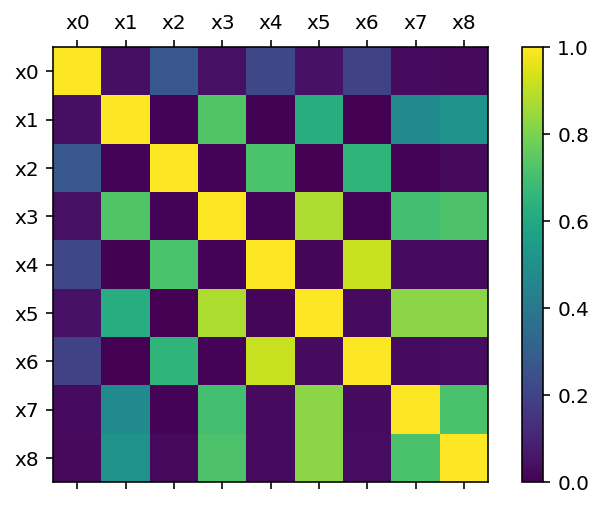

In [48]:
# 使用Matplotlib展示相关性结果
fig = plt.figure()  # 调用figure创建一个绘图对象
ax = fig.add_subplot(111)  # 设置1个子网格并添加子网格对象
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1)  # 绘制热力图，值域从0到1
fig.colorbar(hot_img)  # 为热力图生成颜色渐变条
ticks = np.arange(0, 9, 1)  # 生成0-9，步长为1
ax.set_xticks(ticks)  # 生成x轴刻度
ax.set_yticks(ticks)  # 设置y轴刻度
names = ['x' + str(i) for i in range(x.shape[1])]  # 生成坐标轴标签文字
ax.set_xticklabels(names)  # 生成x轴标签
ax.set_yticklabels(names)  # 生成y轴标签

## 3.8 标准化，让运营数据落入相同的区间

In [49]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [50]:
data = np.loadtxt('data6.txt', delimiter='\t')  # 读取数据

In [51]:
# Z-Score标准化
zscore_scaler = preprocessing.StandardScaler()  # 建立StandardScaler对象
data_scale_1 = zscore_scaler.fit_transform(data)  # StandardScaler标准化处理

In [52]:
# Max-Min标准化
minmax_scaler = preprocessing.MinMaxScaler()  # 建立MinMaxScaler模型对象
data_scale_2 = minmax_scaler.fit_transform(data)  # MinMaxScaler标准化处理

In [53]:
# MaxAbsScaler标准化
maxabsscaler_scaler = preprocessing.MaxAbsScaler()  # 建立MaxAbsScaler对象
data_scale_3 = maxabsscaler_scaler.fit_transform(data)  # MaxAbsScaler标准化处理

In [54]:
# RobustScaler标准化
robustscalerr_scaler = preprocessing.RobustScaler()  # 建立RobustScaler标准化对象
data_scale_4 = robustscalerr_scaler.fit_transform(data)  # RobustScaler标准化标准化处理

Text(0.5,0.98,'raw data and standardized data')

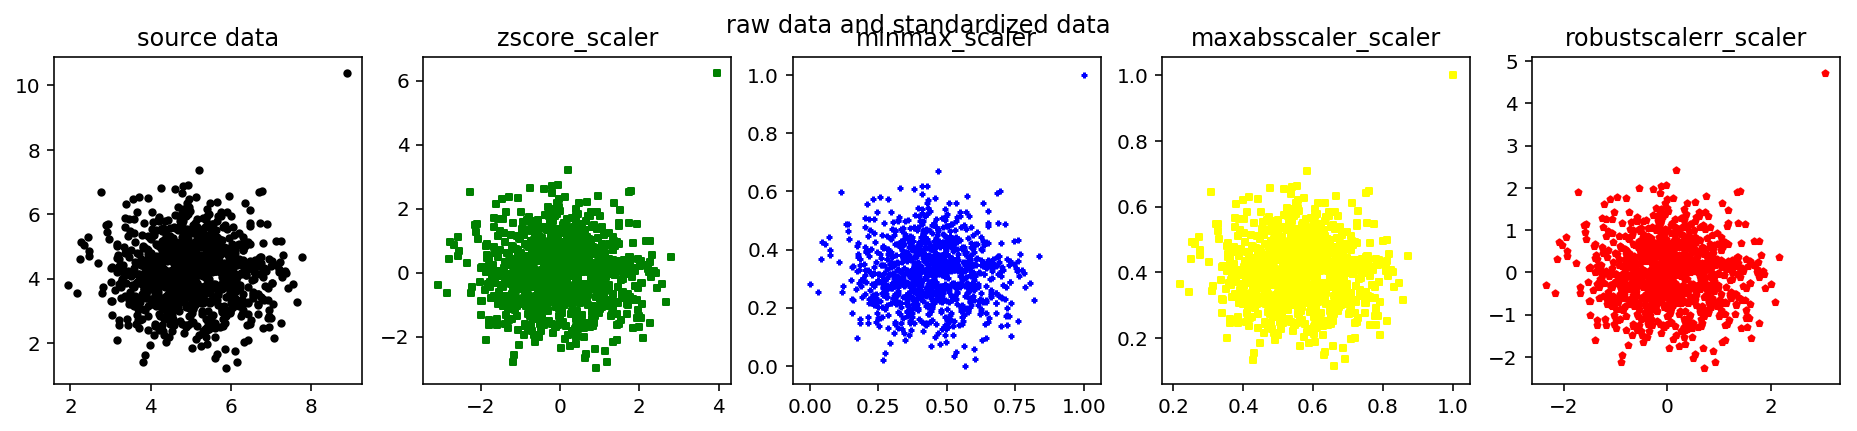

In [55]:
# 展示多网格结果
data_list = [data, data_scale_1, data_scale_2, data_scale_3, data_scale_4]  # 创建数据集列表
color_list = ['black', 'green', 'blue', 'yellow', 'red']  # 创建颜色列表
merker_list = ['o', ',', '+', 's', 'p']  # 创建样式列表
title_list = ['source data', 'zscore_scaler', 'minmax_scaler', 'maxabsscaler_scaler',
              'robustscalerr_scaler']  # 创建标题列表
plt.figure(figsize=(16, 3))
for i, data_single in enumerate(data_list):  # 循环得到索引和每个数值
    plt.subplot(1, 5, i + 1)  # 确定子网格
    plt.scatter(data_single[:, :-1], data_single[:, -1], s=10, marker=merker_list[i],
                c=color_list[i])  # 自网格展示散点图
    plt.title(title_list[i])  # 设置自网格标题
plt.suptitle("raw data and standardized data")  # 设置总标题

## 3.9 离散化，对连续运营数据做逻辑分层

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [57]:
# 读取数据
df = pd.read_table('data7.txt', names=['id', 'amount', 'income', 'datetime', 'age'])  # 读取数据文件
print(df.head(5))  # 打印输出前5条数据

      id  amount  income             datetime    age
0  15093    1390   10.40  2017-04-30 19:24:13   0-10
1  15062    4024    4.68  2017-04-27 22:44:59  70-80
2  15028    6359    3.84  2017-04-27 10:07:55  40-50
3  15012    7759    3.70  2017-04-04 07:28:18  30-40
4  15021     331    4.25  2017-04-08 11:14:00  70-80


In [58]:
# 针对时间数据的离散化
df['datetime'] = list(map(pd.to_datetime,df['datetime'])) # 将时间转换为datetime格式
df['datetime'] = [i.weekday() for i in df['datetime']]# 离散化为周几
print(df.head(5))  # 打印输出前5条数据

      id  amount  income  datetime    age
0  15093    1390   10.40         6   0-10
1  15062    4024    4.68         3  70-80
2  15028    6359    3.84         3  40-50
3  15012    7759    3.70         1  30-40
4  15021     331    4.25         5  70-80


In [59]:
# 针对多值离散数据的离散化
map_df = pd.DataFrame(
    [['0-10', '0-40'], ['10-20', '0-40'], ['20-30', '0-40'], ['30-40', '0-40'], ['40-50', '40-80'],
     ['50-60', '40-80'], ['60-70', '40-80'], ['70-80', '40-80'], ['80-90', '>80'], ['>90', '>80']],
    columns=['age', 'age2'])  # 定义一个要转换的新区间
df_tmp = df.merge(map_df, left_on='age', right_on='age', how='inner')  # 数据框关联匹配
df = df_tmp.drop('age', 1)  # 丢弃名为age的列
print(df.head(5))  # 打印输出前5条数据

      id  amount  income  datetime  age2
0  15093    1390   10.40         6  0-40
1  15064    7952    4.40         0  0-40
2  15080     503    5.72         5  0-40
3  15068    1668    3.19         5  0-40
4  15019    6710    3.20         0  0-40


In [60]:
# 针对连续数据的离散化
# 方法1：自定义分箱区间实现离散化
bins = [0, 200, 1000, 5000, 10000]  # 自定义区间边界
df['amount1'] = pd.cut(df['amount'], bins)  # 使用边界做离散化
print(df.head(5))  # 打印输出前5条数据

      id  amount  income  datetime  age2        amount1
0  15093    1390   10.40         6  0-40   (1000, 5000]
1  15064    7952    4.40         0  0-40  (5000, 10000]
2  15080     503    5.72         5  0-40    (200, 1000]
3  15068    1668    3.19         5  0-40   (1000, 5000]
4  15019    6710    3.20         0  0-40  (5000, 10000]


In [61]:
# 方法2 使用聚类法实现离散化
data = df['amount']  # 获取要聚类的数据，名为amount的列
data_reshape = data.values.reshape((data.shape[0], 1))  # 转换数据形状
model_kmeans = KMeans(n_clusters=4, random_state=0)  # 创建KMeans模型并指定要聚类数量
keames_result = model_kmeans.fit_predict(data_reshape)  # 建模聚类
df['amount2'] = keames_result  # 新离散化的数据合并到原数据框
print(df.head(5))  # 打印输出前5条数据

      id  amount  income  datetime  age2        amount1  amount2
0  15093    1390   10.40         6  0-40   (1000, 5000]        2
1  15064    7952    4.40         0  0-40  (5000, 10000]        1
2  15080     503    5.72         5  0-40    (200, 1000]        2
3  15068    1668    3.19         5  0-40   (1000, 5000]        2
4  15019    6710    3.20         0  0-40  (5000, 10000]        1


In [62]:
# 方法3：使用4分位数实现离散化
df['amount3'] = pd.qcut(df['amount'], 4, labels=['bad', 'medium', 'good', 'awesome'])  # 按四分位数进行分隔
df = df.drop('amount', 1)  # 丢弃名为amount的列
print(df.head(5))  # 打印输出前5条数据

      id  income  datetime  age2        amount1  amount2  amount3
0  15093   10.40         6  0-40   (1000, 5000]        2      bad
1  15064    4.40         0  0-40  (5000, 10000]        1  awesome
2  15080    5.72         5  0-40    (200, 1000]        2      bad
3  15068    3.19         5  0-40   (1000, 5000]        2      bad
4  15019    3.20         0  0-40  (5000, 10000]        1  awesome


In [63]:
# 针对连续数据的二值化
binarizer_scaler = preprocessing.Binarizer(threshold=df['income'].mean())  # 建立Binarizer模型对象
income_tmp = binarizer_scaler.fit_transform(df[['income']])  # Binarizer标准化转换
income_tmp.resize(df['income'].shape)  # 转换数据形状
df['income'] = income_tmp  # Binarizer标准化转换
print(df.head(5))  # 打印输出前5条数据

      id  income  datetime  age2        amount1  amount2  amount3
0  15093     1.0         6  0-40   (1000, 5000]        2      bad
1  15064     1.0         0  0-40  (5000, 10000]        1  awesome
2  15080     1.0         5  0-40    (200, 1000]        2      bad
3  15068     0.0         5  0-40   (1000, 5000]        2      bad
4  15019     0.0         0  0-40  (5000, 10000]        1  awesome


## 3.10.1 网页数据解析

In [64]:
# 导入库
import requests  # 用于发出HTML请求
from bs4 import BeautifulSoup  # 用于HTML格式化处理
import re  # 用于解析HTML配合查找条件
import time  # 用于文件名保存
import pandas as pd # 格式化数据

In [65]:
class WebParse:
    # 初始化对象
    def __init__(self, headers):
        self.headers = headers
        self.article_list = []
        self.home_page = 'http://www.dataivy.cn/'
        self.nav_page = 'http://www.dataivy.cn/page/{0}/'
        self.art_title = None
        self.art_time = None
        self.art_cat = None
        self.art_tags = None

    # 获取页面数量
    def get_max_page_number(self):
        res = requests.get(self.home_page, headers=self.headers)  # 发送请求
        html = res.text  # 获得请求中的返回文本信息
        html_soup = BeautifulSoup(html, "html.parser")  # 建立soup对象
        page_num_code = html_soup.findAll('a', attrs={"class": "page-numbers"})
        num_sets = [re.findall(r'(\d+)', i.text)
                    for i in page_num_code]  # 获得页面字符串类别
        num_int = [int(i[0]) for i in num_sets if len(i) > 0]  # 获得数值页码
        return max(num_int)  # 最大页码
    
    # 获得文章列表
    def find_all_articles(self, i):
        url = self.nav_page.format(i)
        res = requests.get(url, headers=headers)  # 发送请求
        html = res.text  # 获得请求中的返回文本信息
        html_soup = BeautifulSoup(html, "html.parser")  # 建立soup对象，用于处理HTML
        self.article_list = html_soup.findAll('article')

    # 解析单文章
    def parse_single_article(self, article):
        self.art_title = article.find('h2', attrs={"class": "entry-title"}).text
        self.art_time = article.find('time', attrs={
            "class": {"entry-date published", "entry-date published updated"}}).text
        self.art_cat = article.find('a', attrs={"rel": "category tag"}).text
        tags_code = article.find('span', attrs={"class": "tags-links"})
        self.art_tags = '' if tags_code is None else  WebParse._parse_tags(self, tags_code)

    # 内部用解析tag函数
    def _parse_tags(self, tags_code):
        tag_strs = ''
        for i in tags_code.findAll('a'):
            tag_strs = tag_strs + '/' + i.text
        return tag_strs

    # 格式化数据
    def format_data(self):
        return [self.art_title,
                self.art_time,
                self.art_cat,
                self.art_tags]

In [66]:
if __name__ == '__main__':
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101 Safari/537.36'}  # 定义头信息
    data_cols = ['title', 'time', 'cat', 'tags']
    app = WebParse(headers)
    max_num = app.get_max_page_number()
    data_list = []
    for ind in range(max_num):
        app.find_all_articles(ind + 1) # ind从0开始，因此要加1
        for article in app.article_list:
            app.parse_single_article(article)
            data_list.append(app.format_data())
    data_pd = pd.DataFrame(data_list,columns=data_cols)
    print(data_pd.head(2))

             title        time                 cat  \
0    Python应用小坑备忘录  2018年1月12日       Python常用数据工作库   
1  3.12.2 网络用户日志解析   2018年8月9日  《Python数据分析与数据化运营》   

                           tags  
0  /Numpy/pandas/Python/sklearn  
1                  /Python/日志解析  


## 3.10.2 网络用户日志解析

In [7]:
# 导入库
import gzip
import re
import time
import pandas as pd

In [8]:
# 判断是否为爬虫记录
def is_spider(log_record,spiders):
    detect_result = [True if log_record.find(spider) == -1 else False for spider in spiders]
    is_exist = True if all(detect_result) else False
    return is_exist

In [9]:
# 判断是否为UA记录
def is_ua_record(log_record):
    is_ua = True if log_record.find('GET /__ua.gif?') != -1 else False
    return is_ua

In [10]:
# 解析每条日志数据
def split_ua_data(line):
    # 定义不同日志分割的正则表达式
    ip_pat = '[\d.]*'  # 定义IP规则，例如203.208.60.230
    time_pat = '\[[^\[\]]*\]'  # 定义时间规则，例如[02/Mar/2016:14:00:23 +0800]
    request_pat = '\"[^\"]*\"'  # 定义请求规则
    status_pat = '\d+'  # 定义返回的状态码规则，例如200
    bytes_pat = '\d+'  # 返回的字节数，例如326
    refer_pat = '\"[^\"]*\"'  # 定义refer规则
    user_agent_pat = '\"[^\"]*\"'  # 定义user agnet规则
    # 原理：主要通过空格和-来区分各不同项目，各项目内部写各自的匹配表达式
    re_pattern = re.compile('(%s)\ -\ -\ (%s)\ (%s)\ (%s)\ (%s)\ (%s)\ (%s)' % (
        ip_pat, time_pat, request_pat, status_pat, bytes_pat, refer_pat, user_agent_pat),
                                re.VERBOSE)  # 完整表达式模式
    matchs = re_pattern.match(line)  # 匹配
    if matchs != None:  # 如果不为空
        allGroups = matchs.groups()  # 获得所有匹配的列表
        return allGroups[0],allGroups[1],allGroups[2],allGroups[3],allGroups[4],allGroups[5],allGroups[6]
    else: # 否则返回空
        return '','','','','','',''

In [11]:
# 读取日志数据
def get_ua_data(file,spiders):
    ua_data = []
    with gzip.open(file, 'rt') as fn:  # 打开要读取的日志文件对象
        content = fn.readlines()  # 以列表形式读取日志数据
    for single_log in content:  # 循环判断每天记录
        rule1 = is_spider(single_log,spiders)
        rule2 = is_ua_record(single_log)
        if rule1 and rule2:  # 如果同时符合2条规则，则执行
            ua_data.append(split_ua_data(single_log))
    ua_pd = pd.DataFrame(ua_data)
    return ua_pd

In [12]:
#主程序
if __name__ == '__main__':
    file = 'dataivy.cn-Feb-2018.gz'  # 定义原始日志的文件名
    spiders = [
    'AhrefsBot',
    'archive.org_bot',
    'baiduspider',
    'Baiduspider',
    'bingbot',
    'DeuSu',
    'DotBot',
    'Googlebot',
    'iaskspider',
    'MJ12bot',
    'msnbot',
    'Slurp',
    'Sogou web spider',
    'Sogou Push Spider',
    'SputnikBot',
    'Yahoo! Slurp China',
    'Yahoo! Slurp',
    'YisouSpider',
    'YodaoBot',
    'bot.html'
]
    ua_pd = get_ua_data(file,spiders)
    ua_pd.columns = ['ip_add','requet_time','request_info','status','bytes_info','referral','ua']
    output_file = 'ua_result_{0}.xlsx'.format(time.strftime('%Y%m%d%H%M%S',time.localtime(time.time())))
    ua_pd.to_excel(output_file, index=False)
    print('excel file {0} generated!'.format(output_file))


excel file ua_result_20181210095934.xlsx generated!


## 3.10.3 图像的基本预处理

In [73]:
import cv2  # 导入图像处理库
import numpy as np  # 导入numpy库
from matplotlib import pyplot as plt  # 导入展示库

In [74]:
# 展示图像模块
def img_show(img_name, img):
    cv2.imshow(img_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [75]:
# 原始图像
img_file = 'sudoku.png'  # 定义原始数据文件
img = cv2.imread(img_file)  # 以彩色模式读取图像文件
rows, cols, ch = img.shape  # 获取图像形状
img_show('raw img', img)  # 展示彩色图像

In [76]:
# 图像缩放
img_scale = cv2.resize(img, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_CUBIC)  # 图像缩放
img_show('scale img', img_scale)  # 展示缩放后的图像

In [77]:
# 图像平移
M = np.float32([[1, 0, 100], [0, 1, 50]])  # 定义平移中心
img_transform = cv2.warpAffine(img, M, (cols, rows))  # 平移图像
img_show('transform img', img_transform)  # 展示平移后的图像

In [78]:
# 图像旋转
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 0.6)  # 定义旋转中心
img_rotation = cv2.warpAffine(img, M, (cols, rows))  # 第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
img_show('rotation img', img_rotation)  # 展示旋转后的图像

In [79]:
# 透视变换
pts1 = np.float32([[76, 89], [490, 74], [37, 515], [520, 522]])  # 定义变换前的四个校准点
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])  # 定义变换后的四个角点
M = cv2.getPerspectiveTransform(pts1, pts2)  # 定义变换中心点
img_perspective = cv2.warpPerspective(img, M, (300, 300))  # 透视变换
img_show('perspective img', img_perspective)  # 展示透视变换后的图像

In [80]:
# 转换为灰度图像
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 图像转灰度
img_show('gray img', img_gray)  # 展示灰度图像

In [81]:
# 边缘检测
img_edges = cv2.Canny(img, 100, 200)  # 检测图像边缘
img_show('edges img', img_edges)  # 展示图像边缘

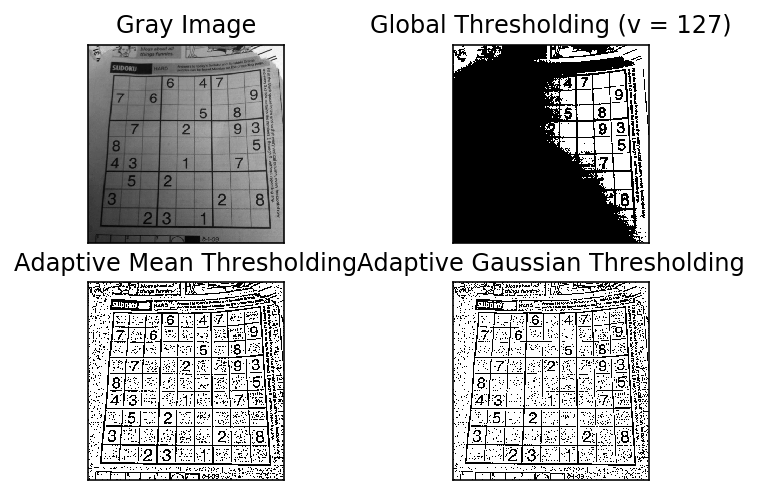

In [82]:
# 图像二值化
ret, th1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)  # 简单阀值
th2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,
                            2)  # 自适应均值阀值
th3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,
                            2)  # 自适应高斯阀值
titles = ['Gray Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']  # 定义图像标题
images = [img_gray, th1, th2, th3]  # 定义图像集
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')  # 以灰度模式展示每个子网格的图像
    plt.title(titles[i])  # 设置每个自网格标题
    plt.xticks([]), plt.yticks([])  # 设置x轴和y轴标题

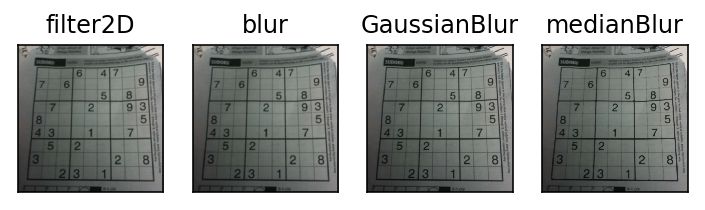

In [83]:
# 图像平滑
kernel = np.ones((5, 5), np.float32) / 25  # 设置平滑内核大小
img_smoth_filter2D = cv2.filter2D(img, -1, kernel)  # 2D卷积法
img_smoth_blur = cv2.blur(img, (5, 5))  # 平均法
img_smoth_gaussianblur = cv2.GaussianBlur(img, (5, 5), 0)  # 高斯模糊
img_smoth_medianblur = cv2.medianBlur(img, 5)  # 中值法
titles = ['filter2D', 'blur', 'GaussianBlur', 'medianBlur']  # 定义标题集
images = [img_smoth_filter2D, img_smoth_blur, img_smoth_gaussianblur, img_smoth_medianblur]  # 定义图像集
for i in range(4):
    plt.subplot(1, 4, i + 1), 
    plt.imshow(images[i], 'gray')  # 以灰度模式展示每个子网格的图像
    plt.title(titles[i])  # 设置每个自网格标题
    plt.xticks([]), plt.yticks([])  # 设置x轴和y轴标题

(<matplotlib.axes._subplots.AxesSubplot at 0x11fb0048>,
 <matplotlib.image.AxesImage at 0x12281048>)

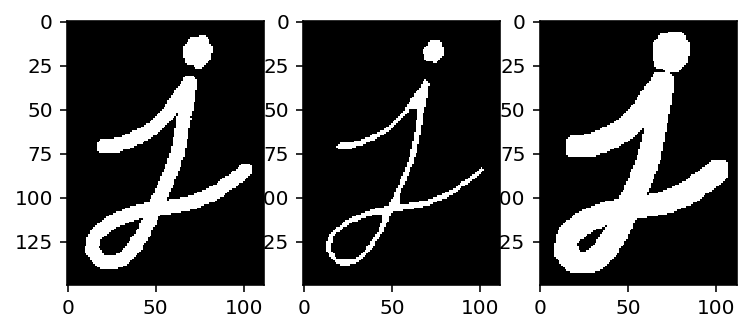

In [84]:
# 形态学处理
img2 = cv2.imread('j.png', 0)  # 以灰度模式读取图像
kernel = np.ones((5, 5), np.uint8)  # 设置形态学处理内核大小
erosion = cv2.erode(img2, kernel, iterations=1)  # 腐蚀
dilation = cv2.dilate(img2, kernel, iterations=1)  # 膨胀
plt.subplot(1, 3, 1), plt.imshow(img2, 'gray')  # 设置自网格1图像
plt.subplot(1, 3, 2), plt.imshow(erosion, 'gray')  # 设置自网格2图像
plt.subplot(1, 3, 3), plt.imshow(dilation, 'gray')  # 设置自网格3图像

## 3.10.4 自然语言文本预处理

In [85]:
# 导入库
import pandas as pd
import jieba  # 结巴分词
from sklearn.feature_extraction.text import TfidfVectorizer  # 基于TF-IDF的词频转向量库

In [86]:
# 分词函数
def jieba_cut(string):
    return list(jieba.cut(string)) # 精确模式分词

In [87]:
# 读取自然语言文件和停用词
with open('text.txt', encoding='utf8') as fn1, open('stop_words.txt', encoding='utf8') as fn2:
    string_lines = fn1.read()
    stop_words = fn2.read()
string_lines = string_lines.split('\n')
stop_words = stop_words.split('\n')

In [88]:
# 中文分词
seg_list = list(map(jieba_cut,string_lines)) # 存储所有分词结果
for i in range(3):  # 打印输出第一行的前5条数据
    print(seg_list[1][i])

Building prefix dict from the default dictionary ...
Loading model from cache D:\system_backup\Temp\jieba.cache
Loading model cost 0.745 seconds.
Prefix dict has been built succesfully.


对于
数据
化


In [89]:
# word to vector
vectorizer = TfidfVectorizer(stop_words=stop_words, tokenizer=jieba_cut)  # 创建词向量模型
vector_value = vectorizer.fit_transform(string_lines).toarray()  # 将文本数据转换为向量空间模型
vector = vectorizer.get_feature_names()  # 获得词向量
vector_pd = pd.DataFrame(vector_value, columns=vector)  # 创建用于展示的数据框
print(vector_pd.head(1))  # 打印输出第一条数据

   python   专业   业务   两个   丰富   主题   二者        产出    人   仍然 ...   适应性  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.221415  0.0  0.0 ...   0.0   

         途径   销售      降低成本        需求   预测   高于    （    ）    ；  
0  0.221415  0.0  0.221415  0.221415  0.0  0.0  0.0  0.0  0.0  

[1 rows x 180 columns]
